In [1]:
# pip install basemap

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import datetime
import random
from scipy import stats
import seaborn as sns
#=========================================
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap

In [5]:
#Read .csv file for output
aviation_data = pd.read_csv("./dataset/airline_data.csv")
#aviation_data.head()

### Get columns from ./dataset/airline_data.csv we are going to perfom calculations on

In [6]:
aviation_data = pd.read_csv("./dataset/airline_data.csv")
aviation_data.head()
flights = aviation_data.to_dict(orient='records')
filtered_flights = []
for flight in flights:
    flight_date = str(flight["month"])
    if flight_date.startswith("11") or flight_date.startswith("12"):
        filtered_flights.append(flight)
print(len(filtered_flights))
formatted_flights = []
random_flights = random.sample(filtered_flights, min(200, len(filtered_flights)))
print(f"Number of randomly selected flights: {len(random_flights)}")
for flight in random_flights:
    airline_name = flight["carrier_name"]
    arrival_airport = flight["airport"]
    airport_name = flight["airport_name"]
    month = flight["month"]
    year = flight["year"]
    airline_delay = flight["carrier_delay"]
    weather_delay = flight["weather_delay"]
    nas_delay = flight["nas_delay"]
    security_delay = flight["security_delay"]
    late_aircraft_delay = flight["late_aircraft_delay"]
    count_airline_delay = flight["carrier_ct"]
    count_weather_delay = flight["weather_ct"]
    count_nas_delay = flight["nas_ct"]
    count_security_delay = flight["security_ct"]
    count_late_aircraft_delay = flight["late_aircraft_ct"]
    # NAS is the National Aviation System
    formatted_flights.append({
        "Year": year,
        "Month": month,
        "Airline Name": airline_name,
        "Arrival Airport": arrival_airport,
        "airport_name": airport_name,
        "Delay due to Airline in Mins": airline_delay,
        "Delay due to Weather in Mins": weather_delay,
        "Delay due to NAS in Mins": nas_delay,
        "Delay due to Security in Mins": security_delay,
        "Delay due to Late Aircraft in Mins": late_aircraft_delay,
        "# of Airline Delays": count_airline_delay,
        "# of Weather Delays": count_weather_delay,
        "# of NAS Delays": count_nas_delay,
        "# of Security Delays": count_security_delay,
        "# of Late Aircraft Delays": count_late_aircraft_delay
    })

11445
Number of randomly selected flights: 200


In [7]:
#Find unique values of the "flight_date"
print(aviation_data["flight_date"].unique())

['12/2023' '11/2023' '10/2023' '9/2023' '8/2023' '7/2023' '6/2023'
 '5/2023' '4/2023' '3/2023' '2/2023' '1/2023' '12/2022' '11/2022'
 '10/2022' '9/2022' '8/2022' '7/2022' '6/2022' '5/2022' '4/2022' '3/2022'
 '2/2022' '1/2022' '12/2021' '11/2021']


In [8]:
#Find random number of given flights
for flight in random_flights[:5]:
        print(flight["flight_date"])

12/2021
12/2023
11/2022
11/2021
12/2021


In [9]:
# Create and print Data Frame
flight_data_df = pd.DataFrame(formatted_flights)

#print(flight_data_df)

In [10]:
flight_data_df.to_csv("./dataset/flights.csv", index=True) #, mode='w')

flight_data_df = pd.read_csv("./dataset/flights.csv", index_col=0)

#flight_data_df.head()

In [12]:
aviation_data

,flight_date,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,12/2023,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,12/2023,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,12/2023,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,12/2023,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,12/2023,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49483,11/2021,2021,11,ZW,Air Wisconsin Airlines Corp,SPI,"Springfield, IL: Abraham Lincoln Capital",59.0,10.0,4.04,...,0.0,1.96,0.0,0.0,907.0,215.0,0.0,154.0,0.0,538.0
49484,11/2021,2021,11,ZW,Air Wisconsin Airlines Corp,SYR,"Syracuse, NY: Syracuse Hancock International",3.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49485,11/2021,2021,11,ZW,Air Wisconsin Airlines Corp,TUL,"Tulsa, OK: Tulsa International",1.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49486,11/2021,2021,11,ZW,Air Wisconsin Airlines Corp,TVC,"Traverse City, MI: Cherry Capital",29.0,8.0,1.39,...,0.0,4.07,0.0,0.0,812.0,100.0,0.0,107.0,0.0,605.0


---

# U.S. Department of Transportation
## The information is presented from Federal Aviation Administration website

---

# Calculations based on Nov-Dec 2021-2023

## Import the data from .csv and the coordinates dataset and merge it with the existing dataset. 

In [13]:
#====Merging=====================================
'''"./dataset/airline_data.csv"'''
#flights_path_aa = "./dataset/flights_aa.csv"
flights_path = "./dataset/flights.csv"
airports_path = "./dataset/airports.csv"
#iata_coords_path = "iata_coords.csv"

flights_data = pd.read_csv(flights_path, low_memory=False)
airports_data = pd.read_csv(airports_path, low_memory=False)

data_merged_df = pd.merge(airports_data, flights_data, on="Arrival Airport")

---

### Plot the coordinates of all airports on a map (hint: use Matplotlib and Basemap).

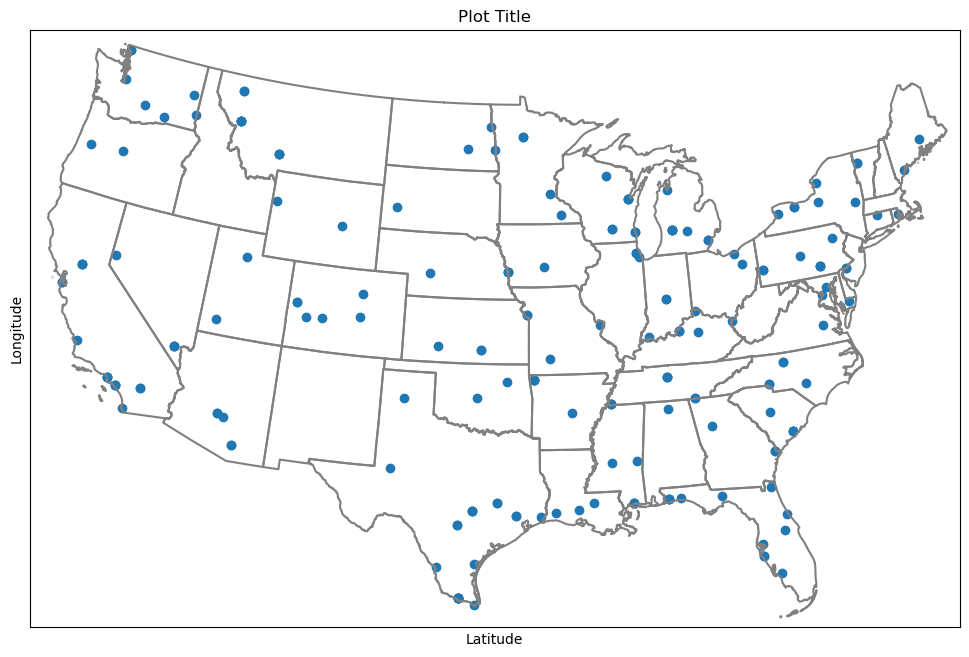

In [14]:
# Read the coordinates file and import all rows.
df_coords = data_merged_df
#aviation_data.head()

#df_coords = pd.read_csv('airport_coordinates.csv')

# Create a new DataFrame with airport codes and names.
df_airports = df_coords[['Arrival Airport', 'airport_name']].drop_duplicates().reset_index(drop=True)

# Merge the coordinates DataFrame with the airports DataFrame.
df_airports = pd.merge(df_airports, df_coords, on='Arrival Airport')


import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Ready the Basemap for display.
fig = plt.figure(figsize=(12, 12))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Plot Title')

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# USa 38.7946° N, 106.5348° W

#Load the shapefile to display the outlines of the US states.
m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=1.5,color='gray')

# Plot the airports on the map.
m.scatter(df_airports['Longitude'].values, df_airports['Latitude'].values, latlon=True)
plt.show()

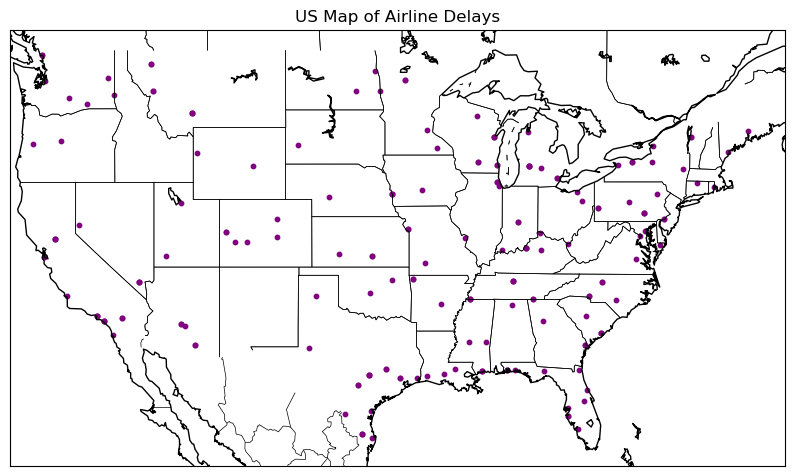

In [15]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap

# Load the airline delays dataset (replace 'your_dataset.csv' with your actual file)
#data = pd.read_csv('your_dataset.csv')
data = data_merged_df
# Assuming your dataset has columns named 'latitude' and 'longitude' for airport locations
lats = data['Latitude'].tolist()
lons = data['Longitude'].tolist()

# Create a figure and axes for the map
fig, ax = plt.subplots(figsize=(10, 8))

# Create a Basemap instance for the US
m = Basemap(projection='merc', llcrnrlat=24, urcrnrlat=50, llcrnrlon=-125, urcrnrlon=-66, resolution='l', ax=ax)

# Draw coastlines and state boundaries
m.drawcoastlines()
m.drawstates()

# Plot the airport locations on the map
x, y = m(lons, lats)
m.scatter(x, y, marker='o', color='purple', s=10)

# Add a title to the plot
plt.title('US Map of Airline Delays')

# Show the plot
plt.show()

---

### Display the number of carriers with the lowest # of Airline Delays Nov-Dec   2021-2023

We group the rows in df by carrier and sum the number of delayed arrivals per carrier. We are only interested in the carriers
 with the lowest number of delayed arrivals. For display purposes,
 we pass the name parameter in our call to reset_index().

In [16]:
data_ads_df = flight_data_df #pd.read_csv("./dataset/flights.csv", index_col=0)
data_ads_df.groupby('Airline Name')['# of Airline Delays'].sum().nsmallest().reset_index(name='num_delays')
#flight_data_df.groupby('Airline Name')['# of Weather Delays'].sum().nlargest(50).reset_index(name='num_delays')

,Airline Name,num_delays
0,CommuteAir LLC dba CommuteAir,10.13
1,Republic Airline,10.73
2,Endeavor Air Inc.,27.47
3,Horizon Air,33.65
4,Air Wisconsin Airlines Corp,34.69


### Display the number of carriers with the largest # of Airline Delays  Nov-Dec   2021-2023

We group the rows in df by carrier and sum the number of delayed arrivals per carrier. We are only interested in the carriers
 with the largest number of delayed arrivals. For display purposes,
 we pass the name parameter in our call to reset_index().

In [17]:
data_adl_df = flight_data_df #pd.read_csv("./dataset/flights.csv", index_col=0)
# nsmallest(10)   <----change the number
data_adl_df.groupby('Airline Name')['# of Airline Delays'].sum().nlargest().reset_index(name='num_delays')

,Airline Name,num_delays
0,Southwest Airlines,992.65
1,United Air Lines Network,383.88
2,SkyWest Airlines Inc.,344.70
3,JetBlue Airways,293.04
4,American Airlines Network,206.29


---

#### Average number of Flight Delays due to Airline in Mins Nov-Dec 2021-2023

In [18]:
# Load the CSV file into a DataFrame
df = pd.read_csv('./dataset/flights.csv')  # replace 'your_file.csv' with your actual file name

# Display the first few rows of the DataFrame to understand its structure
#print(df.head())

# Assuming there is a column named 'time_minutes' that contains the time in minutes
# Convert seconds to hours
df['Delay due to Airline in Mins'] = (df['Delay due to Airline in Mins'] / 60).round(2)
#Creat df for output
out_df = pd.DataFrame(df)

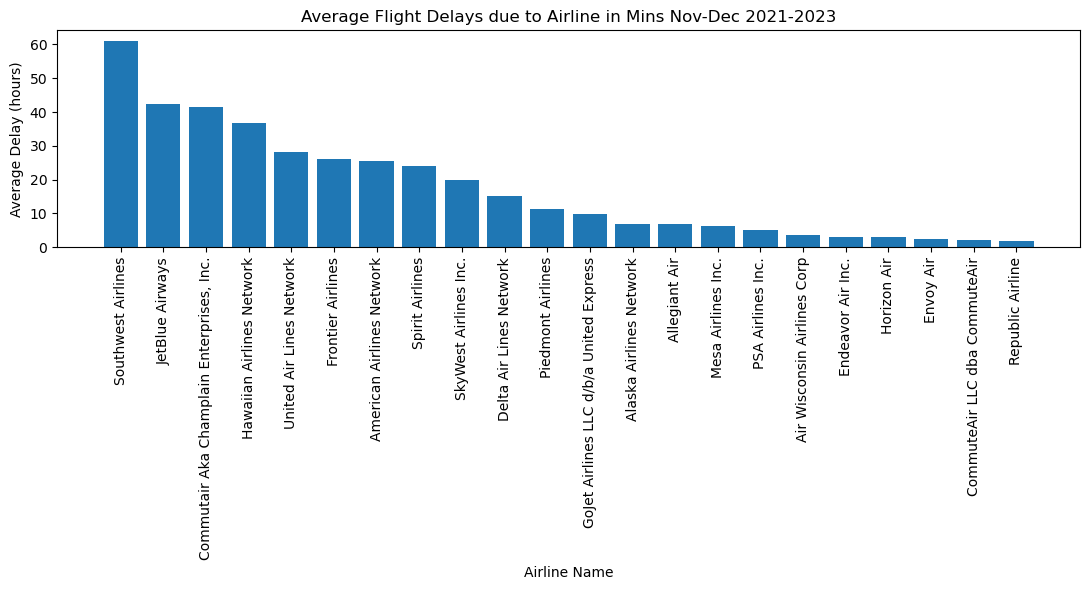

In [21]:
# Assuming you have a dataset named 'flights' with columns 'Airline Name' and 'Delay due to Weather in Mins'
# Replace with your actual dataset and column names

# Load your dataset
flights = out_df

# Group by airline and calculate average delay
#airline_delays = flights.groupby('Airline Name')['Delay due to Weather in Mins'].mean().reset_index()
airline_delays = flights.groupby('Airline Name')['Delay due to Airline in Mins'].mean().reset_index()

# Sort by average delay
airline_delays = airline_delays.sort_values(by='Delay due to Airline in Mins', ascending=False)

# Create the bar plot
plt.figure(figsize=(11, 6))
plt.bar(airline_delays['Airline Name'], airline_delays['Delay due to Airline in Mins'])
plt.xlabel('Airline Name')
plt.ylabel('Average Delay (hours)')
plt.title('Average Flight Delays due to Airline in Mins Nov-Dec 2021-2023')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
#airline_delays

###   # of Late Aircraft Delays

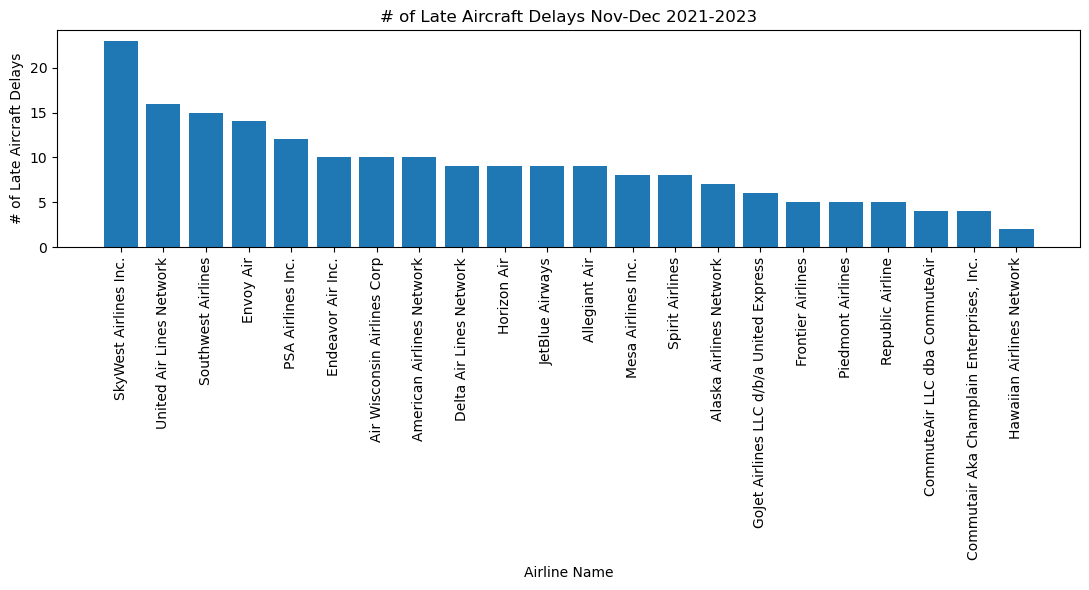

In [22]:
# Assuming you have a dataset named 'flights' with columns 'Airline Name' and 'Delay due to Weather in Mins'
# Replace with your actual dataset and column names

# Load your dataset
#flights = out_df
df = pd.read_csv('./dataset/flights.csv')
# Group by airline and calculate average delay
#airline_delays = flights.groupby('Airline Name')['Delay due to Weather in Mins'].mean().reset_index()
airline_delays = flights.groupby('Airline Name')['# of Late Aircraft Delays'].count().reset_index()

# Sort by average delay
airline_delays = airline_delays.sort_values(by='# of Late Aircraft Delays', ascending=False)

# Create the bar plot
plt.figure(figsize=(11, 6))
plt.bar(airline_delays['Airline Name'], airline_delays['# of Late Aircraft Delays'])
plt.xlabel('Airline Name')
plt.ylabel('# of Late Aircraft Delays')
plt.title('# of Late Aircraft Delays Nov-Dec 2021-2023')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
#airline_delays

### Basic statistical description of airlines
### *Calculate    min  max  count	 mean   on the # of Airline Delays  Nov-Dec  2021-2023*

In [23]:
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean().round()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = flight_data_df['# of Airline Delays'].groupby(flight_data_df['Airline Name']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
Airline Name,,,,
Hawaiian Airlines Network,19.19,71.10,2.0,45.0
"Commutair Aka Champlain Enterprises, Inc.",1.97,85.19,4.0,24.0
CommuteAir LLC dba CommuteAir,1.16,4.46,4.0,3.0
Republic Airline,0.00,4.89,5.0,2.0
Piedmont Airlines,0.00,25.03,5.0,7.0
Frontier Airlines,0.00,69.92,5.0,22.0
GoJet Airlines LLC d/b/a United Express,0.00,37.66,6.0,9.0
Alaska Airlines Network,0.00,21.88,7.0,7.0
Mesa Airlines Inc.,0.00,9.86,8.0,4.0


### Scattered plot for # of Airline Delays

<Figure size 1200x600 with 0 Axes>

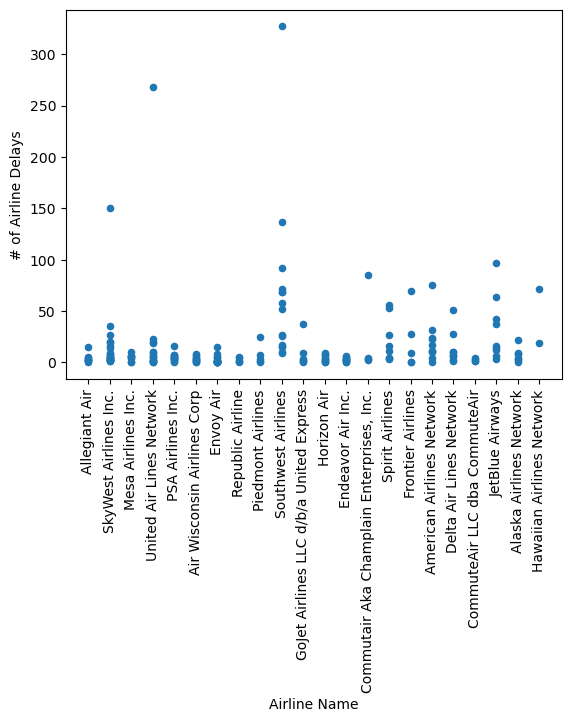

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/flights.csv')
plt.figure(figsize=(12, 6))
df.plot(kind = 'scatter', x = 'Airline Name', y = '# of Airline Delays')
plt.xticks(rotation=90)

plt.show()